In [1]:
import matplotlib.pyplot as plt
import numpy as np
import constant
%load_ext autoreload
%autoreload 2

C:\Users\haime\AppData\Local\Temp\ipykernel_5452\2185463224.py:50: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax.set_xlim(0, 10**5)
C:\Users\haime\AppData\Local\Temp\ipykernel_5452\2185463224.py:50: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax.set_xlim(0, 10**5)
C:\Users\haime\AppData\Local\Temp\ipykernel_5452\2185463224.py:50: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax.set_xlim(0, 10**5)
C:\Users\haime\AppData\Local\Temp\ipykernel_5452\2185463224.py:50: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax.set_xlim(0, 10**5)
C:\Users\haime\AppData\Local\Temp\ipykernel_5452\2185463224.py:50: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax.set_xlim(0, 10**5)
C:\Users\haime\AppData\Local\Temp\ipykernel_5452\2185463224.py:50: UserWarning: Attempt to set non-positive xlim on a log-sca

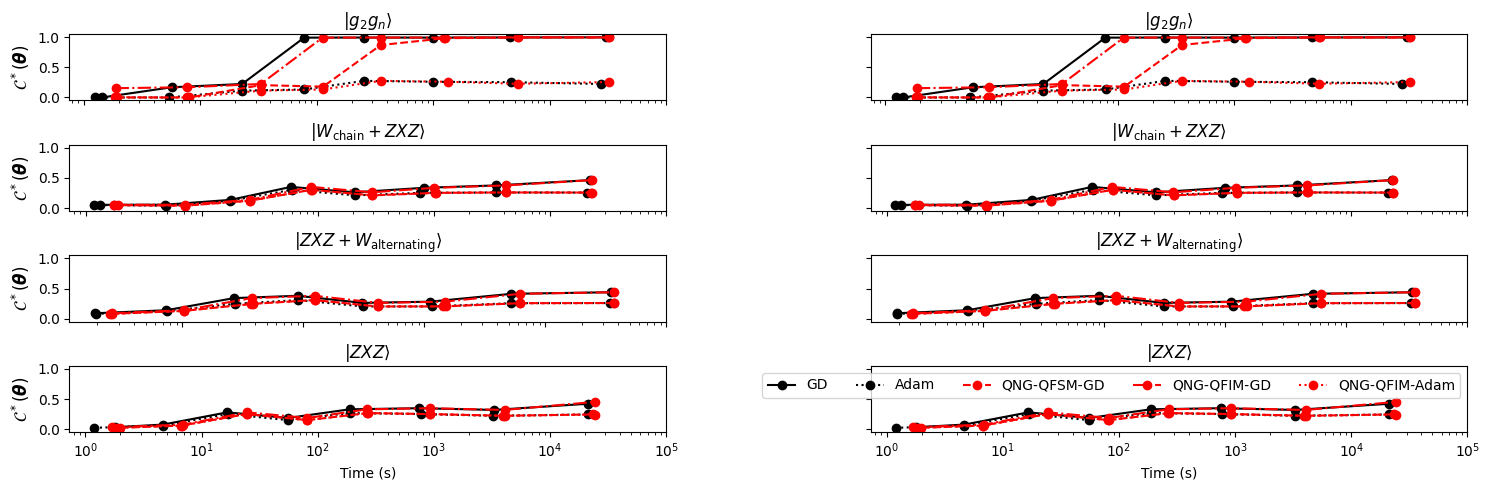

In [57]:
fig, axs = plt.subplots(4, 2, figsize = (15, 5))

for k, ansatz in enumerate(constant.ansatzs):
    for type in [0,1]:
        ax = axs[k, type]
        if type == 0:
            # --------- Begin: Draw cost and time for various qubit numbers ---------
            num_qubits = list(range(2, 10)) # 2 to 10 qubit
            num_layer = 1
            ansatz = constant.ansatzs[k]
            for j, optimizer in enumerate(constant.optimizers_name):
                losss = []
                times = []
                for i, num_qubit in enumerate(num_qubits):
                    # Load data
                    loss = np.loadtxt(f"./data/loss/loss_{num_qubit}qubit_{num_layer}layer_{ansatz}.txt")
                    time = np.loadtxt(f"./data/time/wonder40/times_{num_qubit}qubit_{num_layer}layer_{ansatz}.txt")

                    losss.append(loss[j][-1])
                    times.append(time[j]*50)
                ax.plot(times, losss, marker = 'o', label = constant.optimizers_name[j], linestyle = constant.line_styles[j], color = constant.colors[j])
            # --------- End: Draw cost and time for various qubit numbers ---------
        if type == 1:
            # --------- Begin: Draw cost and time for various layer numbers ---------
            num_layers = list(range(2, 10)) # 2 to 10 qubit
            num_qubits = 5
            for j, optimizer in enumerate(constant.optimizers_name):
                losss = []
                times = []
                for i, num_qubit in enumerate(num_layers):
                    # Load data
                    loss = np.loadtxt(f"./data/loss/loss_{num_qubit}qubit_{num_layer}layer_{ansatz}.txt")
                    time = np.loadtxt(f"./data/time/wonder40/times_{num_qubit}qubit_{num_layer}layer_{ansatz}.txt")

                    losss.append(loss[j][-1])
                    times.append(time[j]*50)
                ax.plot(times, losss, marker = 'o', label = constant.optimizers_name[j], linestyle = constant.line_styles[j], color = constant.colors[j])

            # --------- End: Draw cost and time for various layer numbers ---------

        if k == 0:
            ax.set_title(r"$|g_2 g_n \rangle $")
        if k == 1:
            ax.set_title(r"$|W_{\text{chain}}+ZXZ \rangle $")
        if k == 2:
            ax.set_title(r"$|ZXZ+W_{\text{alternating}} \rangle $") 
        if k == 3:
            ax.set_title(r"$|ZXZ \rangle $")     
        ax.set_xscale("log")
        ax.set_xlim(0, 10**5)
        ax.set_ylim(-0.05, 1.05)
        ax.set_yticks([0, 0.5, 1])
        if type == 0:
            ax.set_ylabel(r"$\mathcal{C}^* (\boldsymbol{\theta})$", fontsize = 12)
        if type == 1:
            ax.set_yticklabels([])
        if k == 3:
            ax.set_xlabel("Time (s)")
        else:
            ax.set_xticklabels([])
        if type == 1 and k == 3:
            ax.legend(ncol = 5)
plt.tight_layout()
plt.savefig('./data/images/mincost_vs_times.svg', bbox_inches='tight')
plt.show()

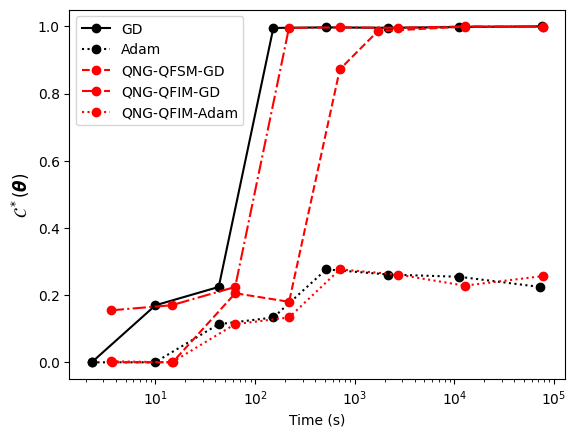

In [12]:
num_layers = list(range(2, 10)) # 2 to 10 qubit
num_qubits = 5
ansatz = "g2gn"
for j, optimizer in enumerate(constant.optimizers_name):
    losss = []
    times = []
    for i, num_qubit in enumerate(num_layers):
        # Load data
        loss = np.loadtxt(f"./data/loss/loss_{num_qubit}qubit_{num_layer}layer_{ansatz}.txt")
        time = np.loadtxt(f"./data/time/cad113/times_{num_qubit}qubit_{num_layer}layer_{ansatz}.txt")

        losss.append(loss[j][-1])
        times.append(time[j]*50)
    plt.plot(times, losss, marker = 'o', label = constant.optimizers_name[j], linestyle = constant.line_styles[j], color = constant.colors[j])

plt.xscale("log")
plt.xlabel("Time (s)")
plt.ylabel(r"$\mathcal{C}^* (\boldsymbol{\theta})$", fontsize = 12)
plt.legend()
plt.show()